In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed'
                 '/curric-data-001-data-sets/master/loans/loansData.csv')

In [71]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [72]:
df.dropna(inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2498 non-null int64
Amount.Funded.By.Investors        2498 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2498 non-null object
Loan.Purpose                      2498 non-null object
Debt.To.Income.Ratio              2498 non-null object
State                             2498 non-null object
Home.Ownership                    2498 non-null object
Monthly.Income                    2498 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2498 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 292.7+ KB


In [74]:
df['Interest.Rate'] = df['Interest.Rate'].map(lambda x: float(x[:-1]))

In [75]:
df['HomeCat'] = pd.Categorical(df['Home.Ownership']).codes

In [76]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,HomeCat
81174,20000,20000,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,0
99592,19200,19200,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,0
80059,35000,35000,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,0
15825,10000,9975,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,0
33182,12000,12000,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,3


In [77]:
est = smf.ols(formula='df["Interest.Rate"] ~ df["Monthly.Income"]', data=df).fit()

In [78]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df["Interest.Rate"]   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.4168
Date:                 Sun, 01 May 2016   Prob (F-statistic):              0.519
Time:                         16:07:17   Log-Likelihood:                -7115.5
No. Observations:                 2498   AIC:                         1.424e+04
Df Residuals:                     2496   BIC:                         1.425e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               12.9929      0.146     88.807      0.000        12.706    13.280
df["Monthly.Income"]  1.363e-05   2.11e-05      0.646      0.519     -2.78e-05   5.5e-05
==============================================================================
Omnibus:                       69.741   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.034
Skew:                           0.273   Prob(JB):                     1.85e-12
Kurtosis:                       2.530   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
est2 = smf.ols(formula='df["Interest.Rate"] ~ df["Monthly.Income"]*HomeCat', data=df).fit()

In [80]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df["Interest.Rate"]   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     6.588
Date:                 Sun, 01 May 2016   Prob (F-statistic):           0.000197
Time:                         16:07:17   Log-Likelihood:                -7105.9
No. Observations:                 2498   AIC:                         1.422e+04
Df Residuals:                     2494   BIC:                         1.424e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       12.6724      0.205     61.802      0.000        12.270    13.074
df["Monthly.Income"]          9.497e-06    2.5e-05      0.380      0.704     -3.96e-05  5.86e-05
HomeCat                          0.0736      0.109      0.675      0.499        -0.140     0.287
df["Monthly.Income"]:HomeCat  3.073e-05   1.72e-05      1.789      0.074     -2.96e-06  6.44e-05
==============================================================================
Omnibus:                       66.657   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.272
Skew:                           0.277   Prob(JB):                     2.70e-12
Kurtosis:                       2.548   Cond. No.                     3.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

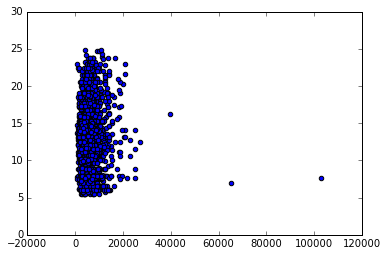

In [81]:
plt.scatter(df["Monthly.Income"], df["Interest.Rate"])